# <font color='red'>Learning Python for Data Analysis And Visualization</font>

### ** Instructor:** [Jose Portilla](https://www.linkedin.com/in/jmportilla)
### ** Official course notebooks:** [github](https://github.com/jmportilla/Udemy-notes/tree/master/)


###### ** About this course: **
Learn python and how to use it to analyze,visualize and present data. Includes 

1. Numpy
1. Pandas
1. Data Wrangling
1. Data Visualization
1. Machine Learning
1. Appendix: Statistics Overview
1. Appendix: SQL and Python
1. Appendix: Web Scraping with Python
1. Appendix: Python Special Offers

## <font color='red'>Data Visualization</font>

### <font color='blue'>Histograms</font>

In [3]:
# Standard
import numpy as np
import pandas as pd
from numpy.random import randn

# Stats
from scipy import stats

# Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Command so that plots appear in the iPython Notebook
%matplotlib inline

First of all, source of information for what a histogram actually is: http://en.wikipedia.org/wiki/Histogram

In [4]:
dataset1 = randn(100)

(array([  4.,   6.,  16.,  13.,  14.,  20.,  18.,   6.,   2.,   1.]),
 array([-1.99732299, -1.52457454, -1.05182608, -0.57907763, -0.10632917,
         0.36641928,  0.83916774,  1.3119162 ,  1.78466465,  2.25741311,
         2.73016156]),
 <a list of 10 Patch objects>)

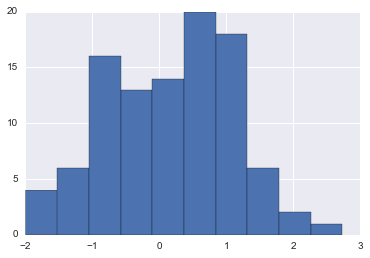

In [5]:
plt.hist(dataset1)

(array([  4.,  10.,  10.,  13.,  21.,   8.,   8.,   4.,   0.,   2.]),
 array([-1.97891644, -1.49374113, -1.00856582, -0.52339051, -0.03821519,
         0.44696012,  0.93213543,  1.41731074,  1.90248605,  2.38766137,
         2.87283668]),
 <a list of 10 Patch objects>)

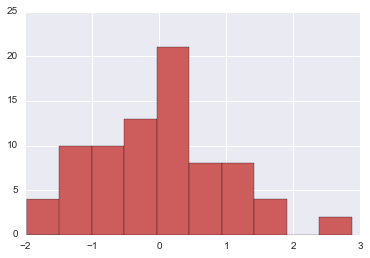

In [6]:
dataset2 = randn(80)
plt.hist(dataset2,color='indianred')

(array([ 0.10305553,  0.10305553,  0.3091666 ,  0.20611106,  0.1545833 ,
         0.36069436,  0.3091666 ,  0.36069436,  0.66986096,  0.41222213,
         0.20611106,  0.20611106,  0.25763883,  0.1545833 ,  0.20611106,
         0.        ,  0.        ,  0.        ,  0.05152777,  0.05152777]),
 array([-1.97891644, -1.73632879, -1.49374113, -1.25115347, -1.00856582,
        -0.76597816, -0.52339051, -0.28080285, -0.03821519,  0.20437246,
         0.44696012,  0.68954777,  0.93213543,  1.17472309,  1.41731074,
         1.6598984 ,  1.90248605,  2.14507371,  2.38766137,  2.63024902,
         2.87283668]),
 <a list of 20 Patch objects>)

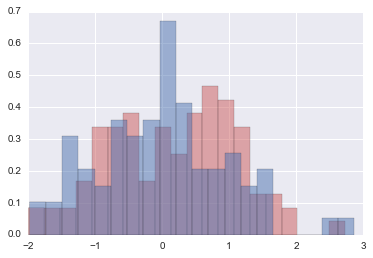

In [7]:
# We can use normed to plot on same plot

# Set normed=True for the plots to be normalized in order to comapre data sets with different number of observations
# Set alpha=0.5 for transperancy

plt.hist(dataset1,normed=True,color='indianred',alpha=0.5,bins=20)
plt.hist(dataset2,normed=True,alpha=0.5,bins=20)

In [8]:
data1 = randn(1000)
data2 = randn(1000)

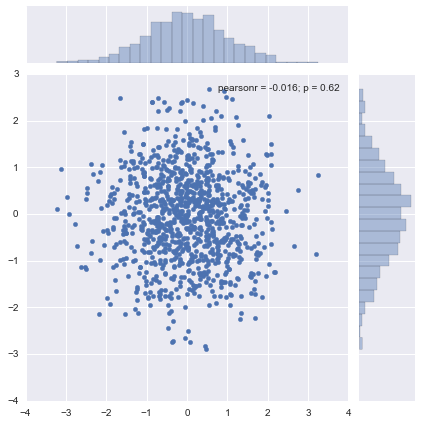

In [9]:
sns.jointplot(data1,data2)

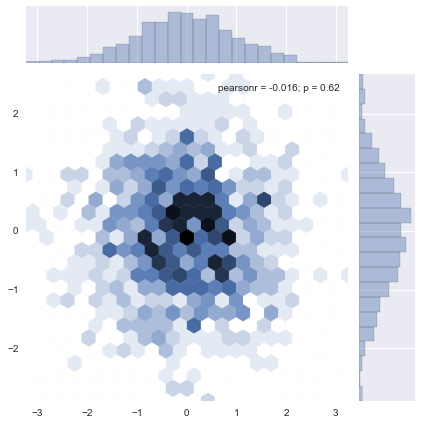

In [10]:
sns.jointplot(data1,data2,kind='hex')

### <font color='blue'>Kernel Density Estimate Plots</font>
* More info on types
* url = 'http://en.wikipedia.org/wiki/Kernel_(statistics)'

In [ ]:
# Standard
import numpy as np
import pandas as pd
from numpy.random import randn

# Stats
from scipy import stats

# Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Command so that plots appear in the iPython Notebook
%matplotlib inline

In [11]:
dataset = randn(25)

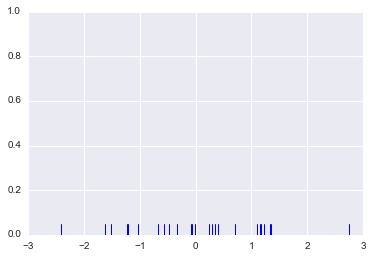

In [12]:
sns.rugplot(dataset)

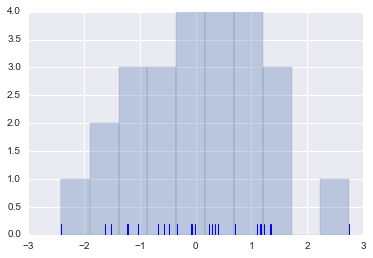

In [13]:
plt.hist(dataset,alpha=0.3)
sns.rugplot(dataset)

(0, 1)

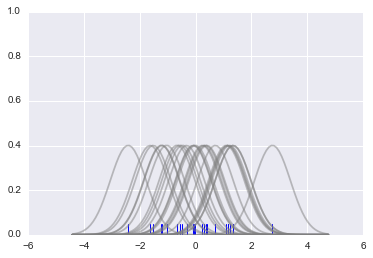

In [14]:
# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

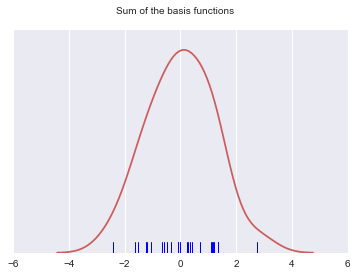

In [15]:
sum_of_kde = np.sum(kernel_list,axis=0)

fig = plt.plot(x_axis,sum_of_kde,color='indianred')

sns.rugplot(dataset)

plt.yticks([])

plt.suptitle("Sum of the basis functions")

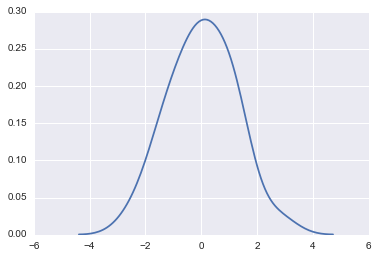

In [16]:
sns.kdeplot(dataset)

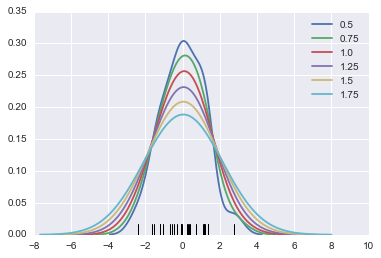

In [18]:
sns.rugplot(dataset,color='black')

for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw=bw,lw=1.8,label=bw)

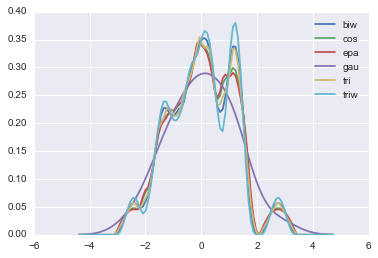

In [20]:
# We can also choose different kernels

kernel_options = ["biw", "cos", "epa", "gau", "tri", "triw"]

for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern)

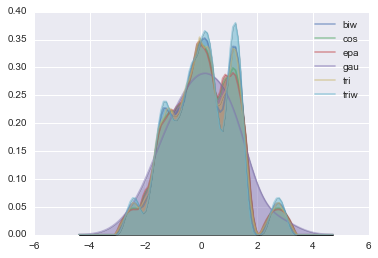

In [21]:
for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern,shade=True,alpha=0.5)

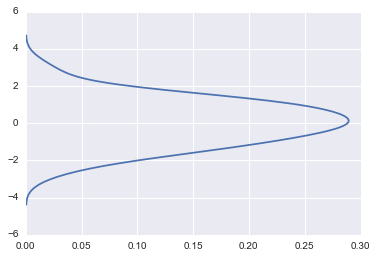

In [22]:
# For vertical axis, use the vertical keyword
sns.kdeplot(dataset,vertical=True)

Finally we can also use kde plot to create a cumulative distribution function (CDF) of the data

* URL for info on CDF
* url = 'http://en.wikipedia.org/wiki/Cumulative_distribution_function'

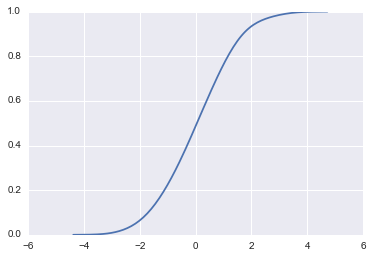

In [23]:
sns.kdeplot(dataset,cumulative=True)

* Multivariate Density Estimation using kdeplot
* We can also use kdeplot for multidimensional data. Lets see how it works!

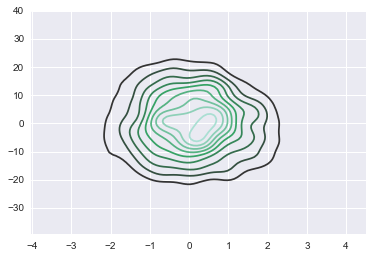

In [24]:
# Let's create a new dataset

# Mean center of data
mean = [0,0]

# Diagonal covariance
cov = [[1,0],[0,100]]

# Create dataset using numpy
dataset2 = np.random.multivariate_normal(mean,cov,1000)

# Bring back our old friend pandas
dframe = pd.DataFrame(dataset2,columns=['X','Y'])

# Plot our dataframe
sns.kdeplot(dframe)

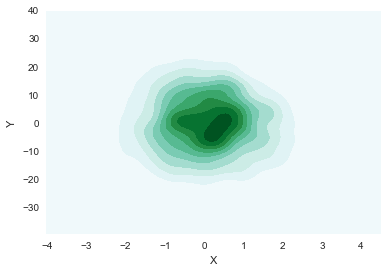

In [25]:
# We could have also passed two vectors seperately, and shade
sns.kdeplot(dframe.X,dframe.Y,shade=True)

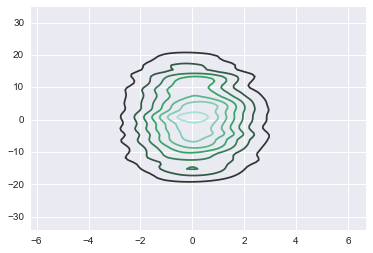

In [27]:
# Can specify a particualr bandwidth
sns.kdeplot(dframe,bw=1)

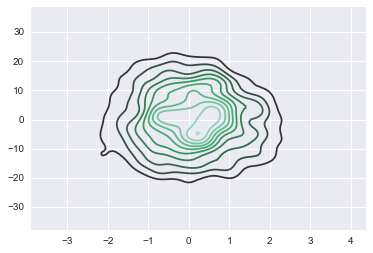

In [28]:
# Or just use silverman again
sns.kdeplot(dframe,bw='silverman')

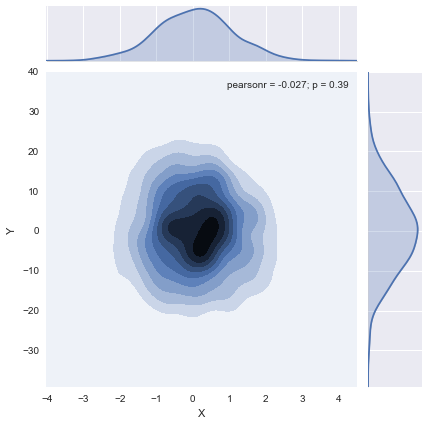

In [29]:
# We can also create a kde joint plot, simliar to the hexbin plots we saw before

sns.jointplot('X','Y',dframe,kind='kde')

### <font color='blue'>Combining Plot Styles</font>

In [30]:
# Standard
import numpy as np
import pandas as pd
from numpy.random import randn

# Stats
from scipy import stats

# Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Command so that plots appear in the iPython Notebook
%matplotlib inline

In [31]:
dataset = randn(100)

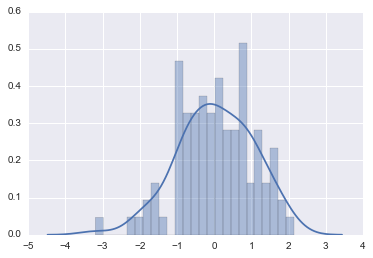

In [33]:
sns.distplot(dataset,bins=25)

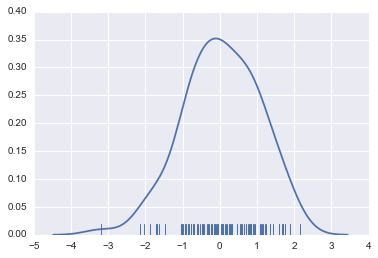

In [34]:
sns.distplot(dataset,bins=25,rug=True,hist=False)

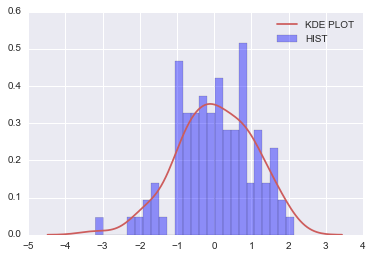

In [35]:
sns.distplot(dataset,bins=25,
            kde_kws={'color':'indianred','label':'KDE PLOT'},
            hist_kws={'color':'blue','label':'HIST'})

In [36]:
from pandas import Series

In [37]:
# Create Series form dataset
ser1 = Series(dataset,name='My_DATA')

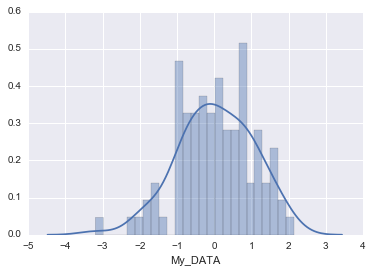

In [38]:
# Plot Series
sns.distplot(ser1,bins=25)

### <font color='blue'>Box and Violin Plots</font>

* Now we'll learn about box and violin plots
* url = 'http://en.wikipedia.org/wiki/Box_plot#mediaviewer/File:Boxplot_vs_PDF.svg'

In [ ]:
# Standard
import numpy as np
import pandas as pd
from numpy.random import randn

# Stats
from scipy import stats

# Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Command so that plots appear in the iPython Notebook
%matplotlib inline

In [46]:
# Let's create two distributions
data1 = np.random.randn(100)
data2 = np.random.randn(100) + 2 # Off set the mean

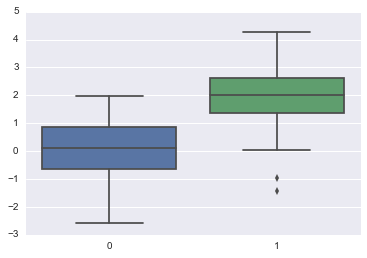

In [48]:
# Now we can create a box plot
sns.boxplot(data=[data1,data2])

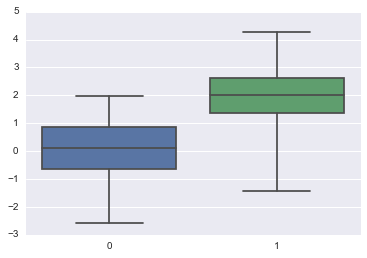

In [49]:
# Notice how the previous plot had outlier points, we can include those with the "whiskers"
sns.boxplot(data=[data1,data2],whis=np.inf)

y:\Anaconda3\envs\gl-env\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


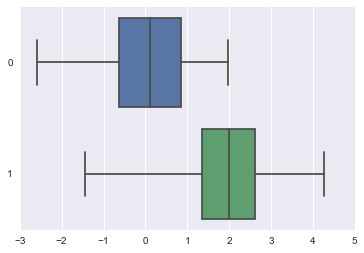

In [50]:
# WE can also set horizontal by setting vertical to false
sns.boxplot(data=[data1,data2],whis=np.inf, vert = False)

In [51]:
# While box plots are great, they can sometimes not give the full picture

# Violin/Viola plots can combine the simplicity of a box plot with the information of a kde plot

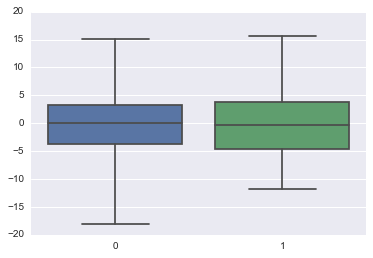

In [53]:

# Let's create an example where a box plot doesn't give the whole picture

# Normal Distribution
data1 = stats.norm(0,5).rvs(100)

# Two gamma distributions concatenated together (Second one is inverted)
data2 = np.concatenate([stats.gamma(5).rvs(50)-1,
                        -1*stats.gamma(5).rvs(50)])

# Box plot them
sns.boxplot(data=[data1,data2],whis=np.inf)

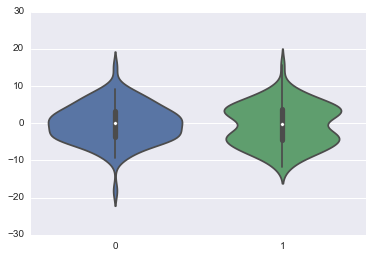

In [54]:
# From the above plots, you may think that the distributions are fairly similar
# But lets check out what a violin plot reveals
sns.violinplot(data=[data1,data2])

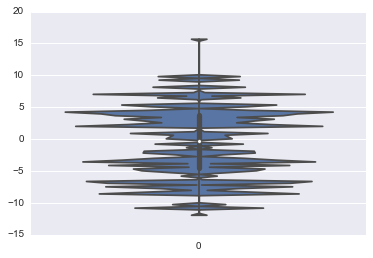

In [57]:
# We can also change the bandwidth of the kernel used for the density fit of the violin plots if desired
sns.violinplot(data=data2,bw=0.01)

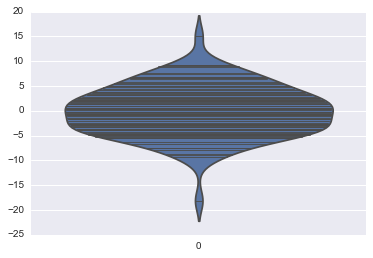

In [58]:
# Much like a rug plot, we can also include the individual points, or sticks
sns.violinplot(data=data1,inner="stick")

### <font color='blue'>Regression Plots</font>

In [ ]:
# Standard
import numpy as np
import pandas as pd
from numpy.random import randn

# Stats
from scipy import stats

# Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Command so that plots appear in the iPython Notebook
%matplotlib inline

In [59]:
# Now we'll learn how ot visualize multiple regression with lmplot()

# Luckily, Seaborn comes with an example dataset to use as a pandas DataFrame
tips = sns.load_dataset("tips")

In [60]:
# Preview
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


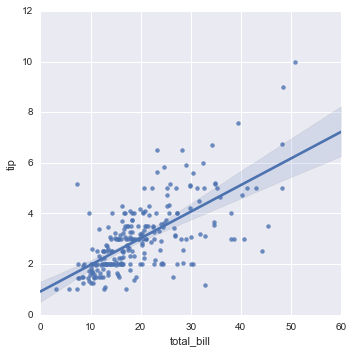

In [61]:
# Let's use lmplot() to plot the total bill versus tips
sns.lmplot("total_bill","tip",tips)

In [62]:
# First we can see a scatter plot of all the points, tip vs total_bill
# Then we see a linear regression line, which is an estimateed linear fit model to the data

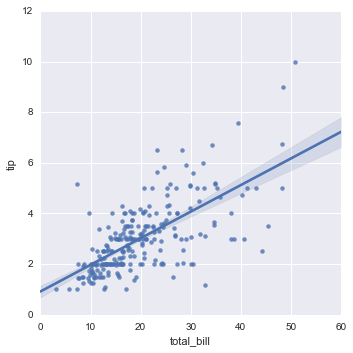

In [63]:
# WE can also specify teh confidence interval to use for the linear fit

sns.lmplot("total_bill","tip",tips,ci=75) # 68% ci

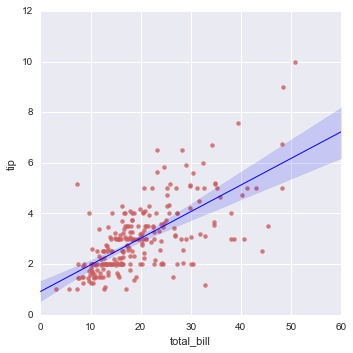

In [64]:
# Just like before, we can use dictionaries to edit individual parts of the plot

sns.lmplot("total_bill", "tip", tips,
           scatter_kws={"marker": "o", "color": "indianred"},
           line_kws={"linewidth": 1, "color": "blue"});

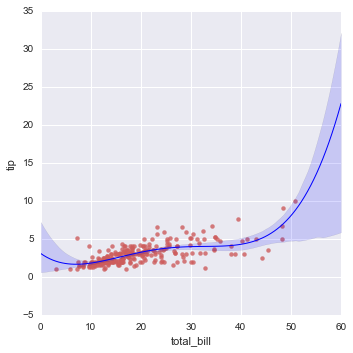

In [65]:
# WE can also check out higher-order trends

sns.lmplot("total_bill", "tip", tips, order=4,
           scatter_kws={"marker": "o", "color": "indianred"},
           line_kws={"linewidth": 1, "color": "blue"})

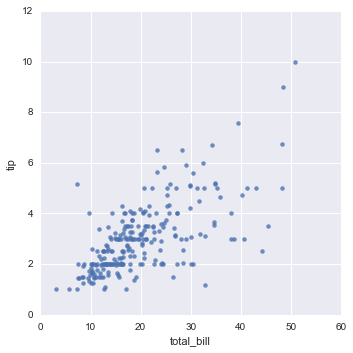

In [66]:
# We can also not fit a regression if desired
sns.lmplot("total_bill", "tip", tips, fit_reg=False)

In [67]:
# lmplot() also works on discrete variables, such as the percentage of the tip

# Create a new column for tip percentage
tips["tip_pect"]=100*(tips['tip']/tips['total_bill'])
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pect
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


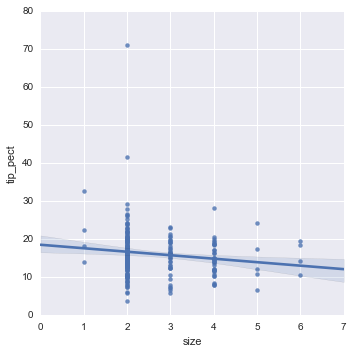

In [68]:
#plot
sns.lmplot("size", "tip_pect", tips);

In [71]:
# We can also add jitter to this

#Info link
#url = "http://en.wikipedia.org/wiki/Jitter"

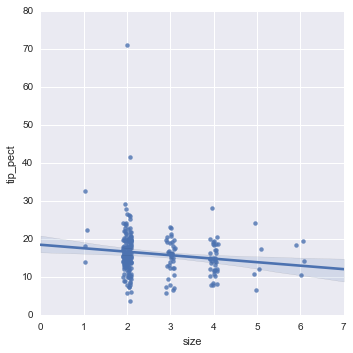

In [72]:
#plot
sns.lmplot("size", "tip_pect", tips,x_jitter=.1);

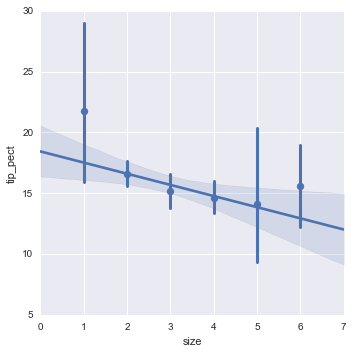

In [73]:
# We can also estimate the tendency of each bin (size of party in this case)
sns.lmplot("size", "tip_pect", tips, x_estimator=np.mean);

In [ ]:
# Interesting, looks like there is more variance for party sizes of 1 then 2-4

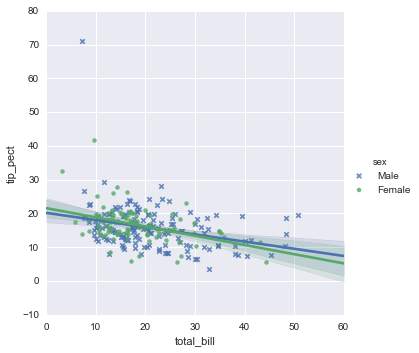

In [74]:
# We can use the hue facet to automatically define subsets along a column

# Plot, note the markers argument
sns.lmplot("total_bill", "tip_pect", tips, hue="sex",markers=["x","o"])

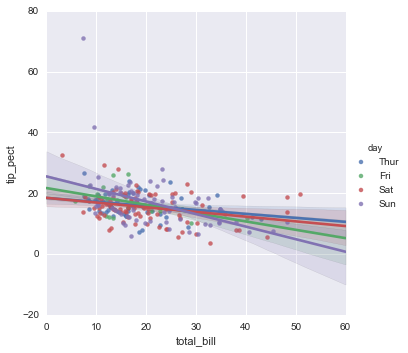

In [75]:
# Does day make a difference?
sns.lmplot("total_bill", "tip_pect", tips, hue="day")

In [76]:
# Finally it should be noted that Seabron supports LOESS model fitting
# url = 'http://en.wikipedia.org/wiki/Local_regression'

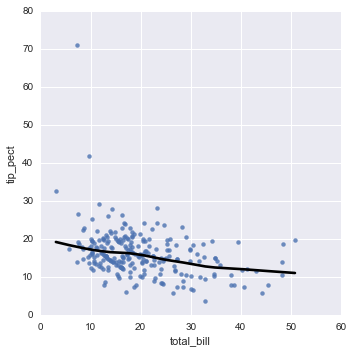

In [77]:
sns.lmplot("total_bill", "tip_pect", tips, lowess=True, line_kws={"color": 'black'});

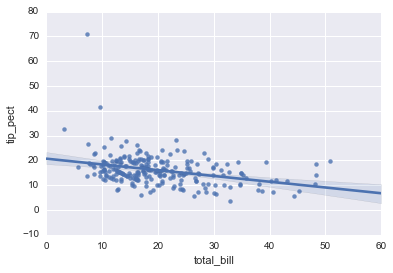

In [78]:
# The lmplot() we've been using is actually using a lower-level function, regplot()

sns.regplot("total_bill","tip_pect",tips)

y:\Anaconda3\envs\gl-env\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


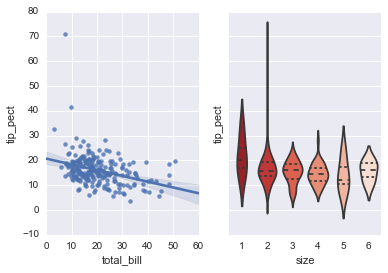

In [88]:
# reg_plot can be added to existing axes without modifying anything in the figure

# Create figure with 2 subplots
fig, (axis1,axis2) = plt.subplots(1,2,sharey =True)

sns.regplot("total_bill","tip_pect",tips,ax=axis1)
sns.violinplot(x='size',y='tip_pect',data=tips.sort('size'),ax=axis2,palette='Reds_r',inner='quartile')

### <font color='blue'>Heatmaps and Clustered Matrices</font>

In [89]:
# Again seaborn comes with a great dataset to play and learn with
flight_dframe = sns.load_dataset('flights')
flight_dframe.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [90]:
# Let's pivot this dataframe do its easier to manage
flight_dframe = flight_dframe.pivot("month","year","passengers")
flight_dframe

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


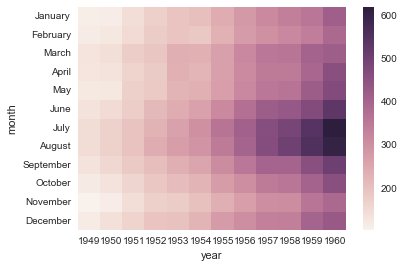

In [91]:
# This dataset is now in a clear format to be dispalyed as a heatmap
sns.heatmap(flight_dframe)

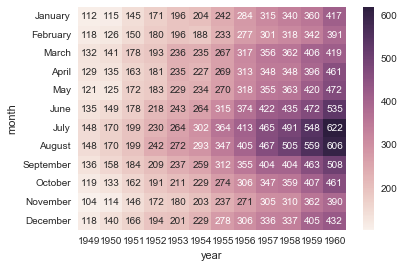

In [92]:
# We also have the option to annotate each cell
sns.heatmap(flight_dframe,annot=True,fmt='d')

In [93]:
# seaborn will automatically try to pick the best color scheme for your dataset, whether is be diverging or converging colormap

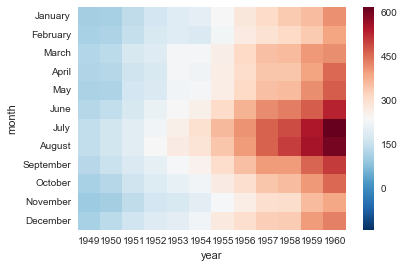

In [94]:
# We can choose our own 'center' for our colormap
sns.heatmap(flight_dframe,center=flight_dframe.loc['January',1955])

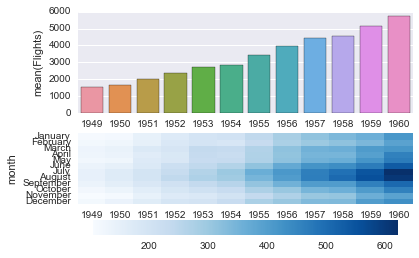

In [95]:
# heatmap() can be used on an axes for a subplot to create more informative figures
f, (axis1,axis2) = plt.subplots(2,1)

yearly_flights = flight_dframe.sum()

# Since yearly_flights is a weird format, we'll have to grab the values we want with a Series, then put them in a dframe

years = pd.Series(yearly_flights.index.values)
years = pd.DataFrame(years)

flights = pd.Series(yearly_flights.values) 
flights = pd.DataFrame(flights)

# Make the dframe and name columns
year_dframe = pd.concat((years,flights),axis=1)
year_dframe.columns = ['Year','Flights']



# Create the bar plot on top
sns.barplot('Year',y='Flights',data=year_dframe, ax = axis1)

# Create the heatmap on bottom
sns.heatmap(flight_dframe,cmap='Blues',ax=axis2,cbar_kws={"orientation": "horizontal"})

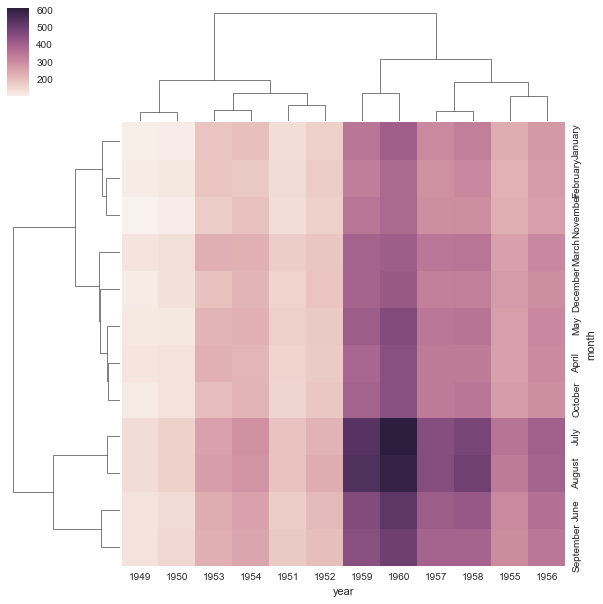

In [96]:
# Finally we'll learn about using a clustermap

# Clustermap will reformat the heatmap so similar rows are next to each other
sns.clustermap(flight_dframe)

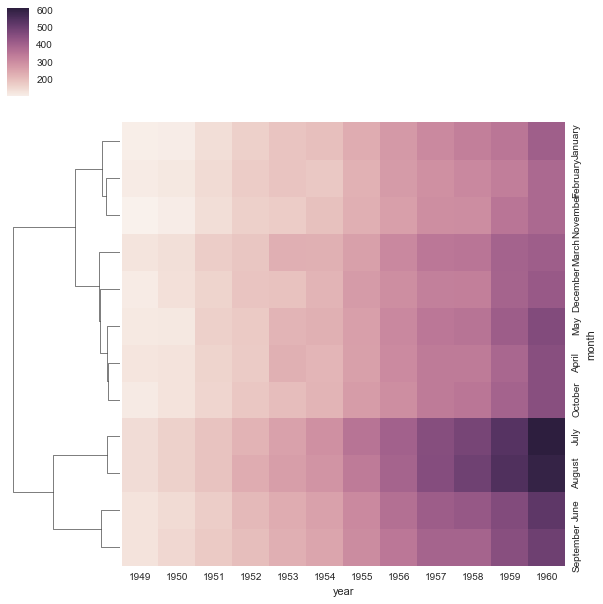

In [97]:
# Let's uncluster the columns
sns.clustermap(flight_dframe,col_cluster=False)

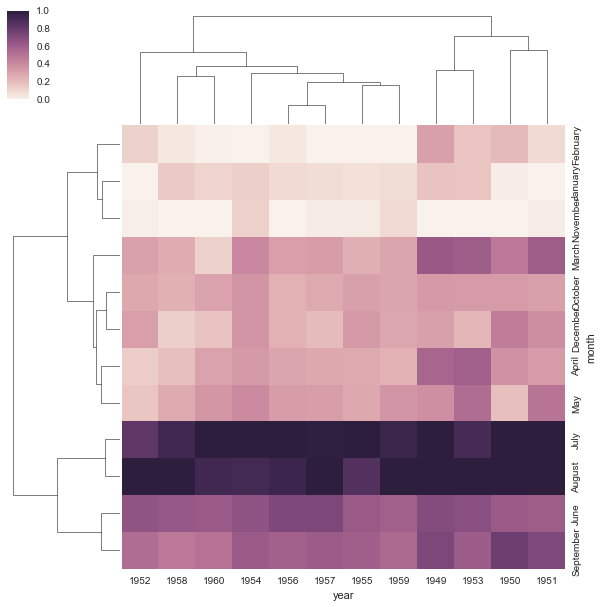

In [98]:
# Since the number of flights increase every year, we should set a standard scale
sns.clustermap(flight_dframe,standard_scale=1) # standardize by columns (year)

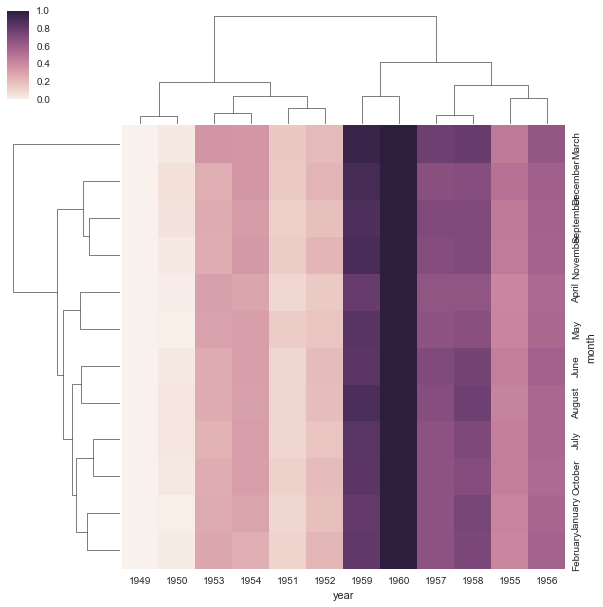

In [99]:
# Or scale the rows
sns.clustermap(flight_dframe,standard_scale=0)

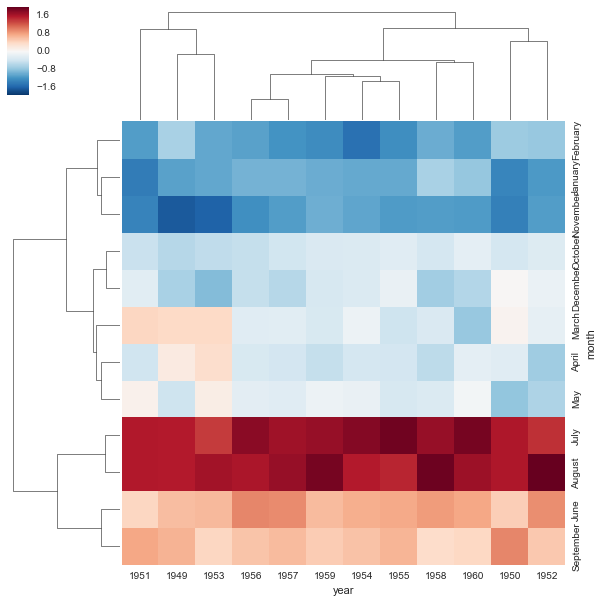

In [100]:
# Finally we can also normalize the rows by their Z-score.
# This subtracts the mean and devides by the STD of each column, then teh rows have amean of 0 and a variance of 1
sns.clustermap(flight_dframe,z_score=1)